In [73]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# Ensures plots are displayed inside the notebook
%matplotlib inline
import plotly.express as px
import seaborn as sns
import warnings
print("All imports work fine")

All imports work fine


In [74]:
warnings.filterwarnings('ignore')  # ignore notifications

In [75]:
import os
folder_path = r"D:\UCL23-24_analytics\Data Sources"

for dirname, _, filenames in os.walk(folder_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.options.display.max_columns = None

D:\UCL23-24_analytics\Data Sources\ChampionsLeague.xlsx


In [76]:
df = pd.read_excel(r"D:\UCL23-24_analytics\Data Sources\ChampionsLeague.xlsx")

In [77]:
df.head()

,S.N,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goals,Country
0,1,F,Real Madrid,12,8,4,0,26,15,11,28,24.0,15.4,8.6,0.72,W W W W D,72777,"Joselu, Vinicius Júnior...",5,es
1,2,F,Dortmund,12,7,3,2,17,9,8,24,15.1,22.4,-7.3,-0.61,W W W L W,81365,Niclas Füllkrug,3,de
2,3,SF,Bayern Munich,12,7,3,2,21,13,8,24,19.0,15.0,4.0,0.33,D L L W L,75000,Harry Kane,8,de
3,4,SF,Paris S-G,12,5,2,5,19,15,4,17,24.3,13.3,11.0,0.91,L L L W W,46686,Kylian Mbappé,8,fr
4,5,QF,Manchester City,10,8,2,0,28,13,15,26,24.6,6.9,17.7,1.77,W W W W W,51298,Erling Haaland,6,eng


In [78]:
# Set Seaborn style
sns.set(style="whitegrid")

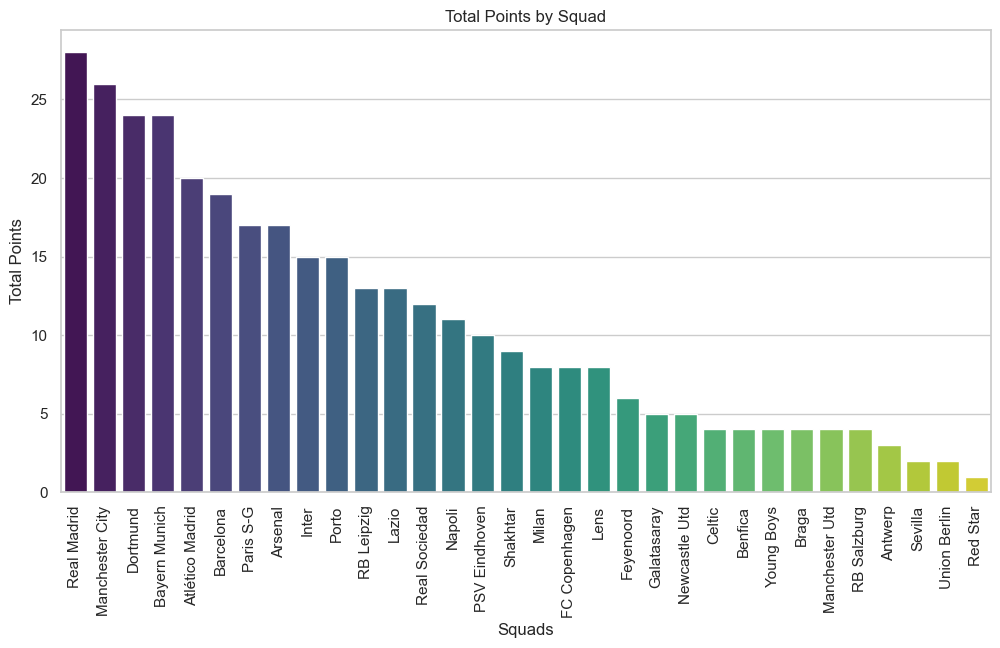

In [79]:
### 1) Squad Performance Analysis ###
plt.figure(figsize=(12, 6))
team_performance = df.groupby("Squad")["Pts"].sum().sort_values(ascending=False)
sns.barplot(x=team_performance.index, y=team_performance.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Total Points by Squad")
plt.xlabel("Squads")
plt.ylabel("Total Points")
plt.show()

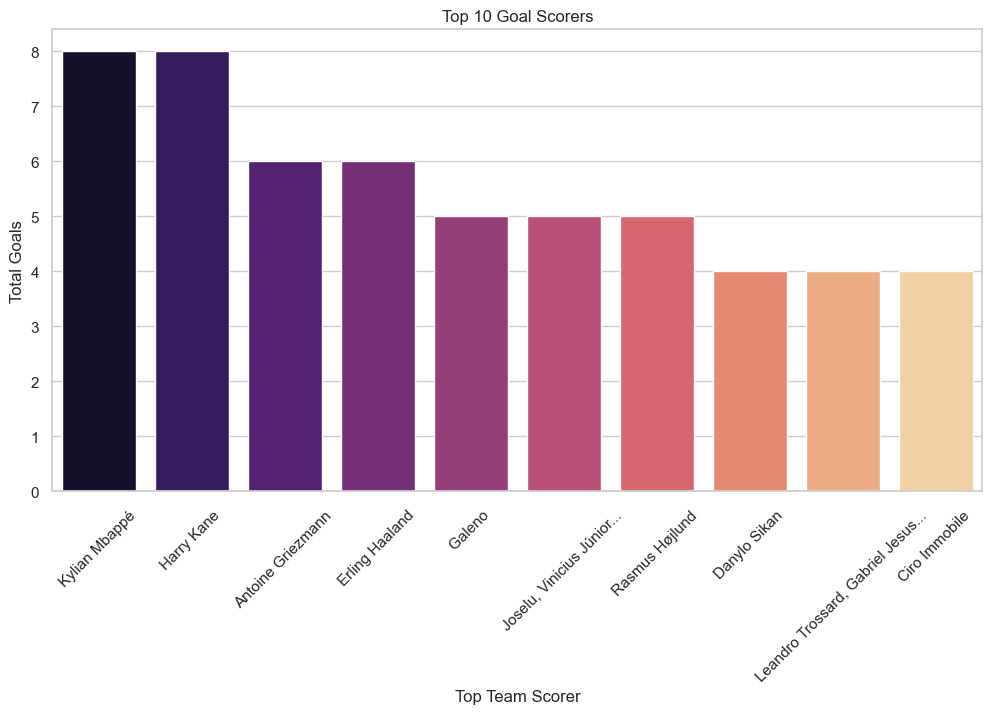

In [80]:
### 2️) Top Goal Scorers ###
plt.figure(figsize=(12, 6))
top_scorers = df.groupby("Top Team Scorer")["Goals"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_scorers.index, y=top_scorers.values, palette="magma")
plt.xticks(rotation=45)
plt.title("Top 10 Goal Scorers")
plt.xlabel("Top Team Scorer")
plt.ylabel("Total Goals")
plt.show()

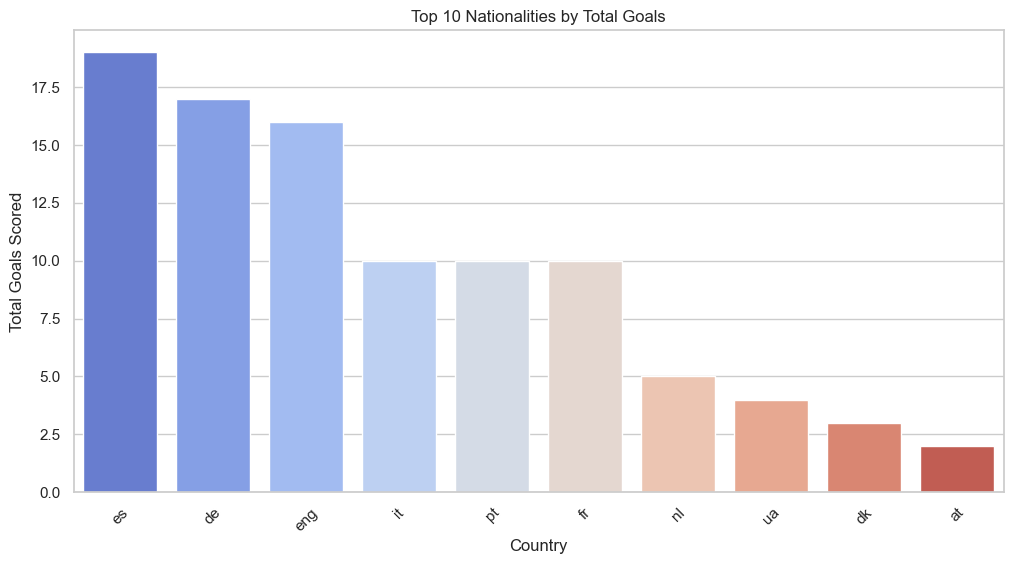

In [81]:
### 3️) Player Nationality vs Goals Scored ###
plt.figure(figsize=(12, 6))
nationality_goals = df.groupby("Country")["Goals"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=nationality_goals.index, y=nationality_goals.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 10 Nationalities by Total Goals")
plt.xlabel("Country")
plt.ylabel("Total Goals Scored")
plt.show()

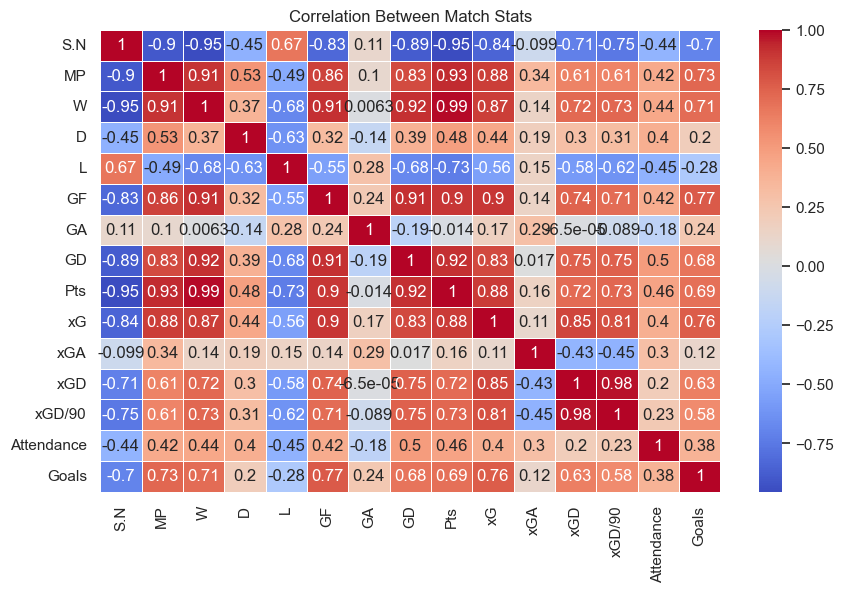

In [82]:
### 4️) Correlation Analysis ###
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Match Stats")
plt.show()

In [83]:
# Group the data by 'Stage' and calculate average attendance
attendance_by_stage = df.groupby('Rk')['Attendance'].mean().sort_values(ascending=False)

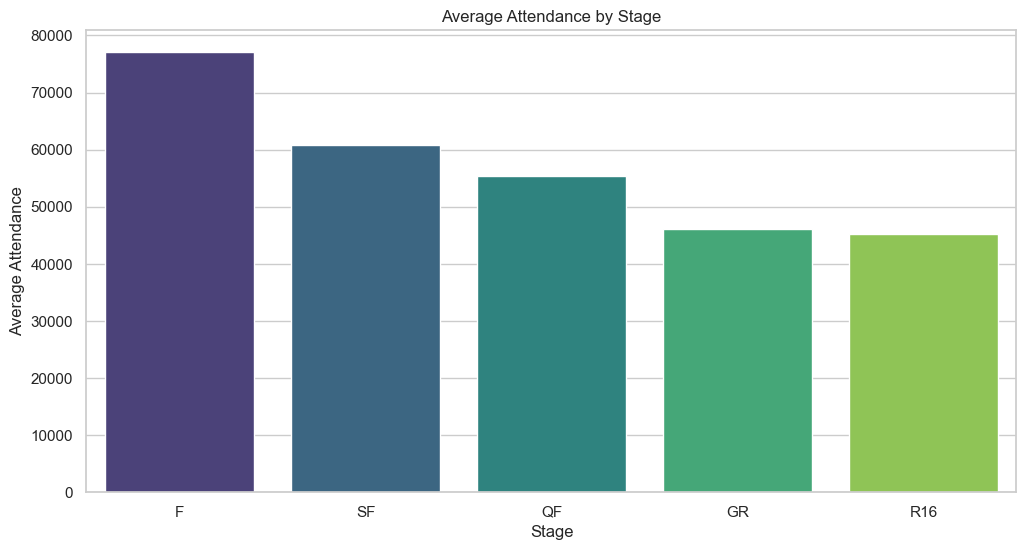

In [84]:
# 5) Plot the attendance by stage
plt.figure(figsize=(12, 6))
sns.barplot(x=attendance_by_stage.index, y=attendance_by_stage.values, palette="viridis")
plt.title("Average Attendance by Stage")
plt.xlabel("Stage")
plt.ylabel("Average Attendance")
plt.show()

In [85]:
# Filter the data for Real Madrid (assuming 'Squad' is the team name column)
real_madrid_stats = df[df['Squad'] == 'Real Madrid']

# Extract the important columns
real_madrid_summary = real_madrid_stats[['Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance', 'Top Team Scorer', 'Goals', 'Country']]

# Print the full stats for Real Madrid (tournament winner)
print("\n--- Real Madrid Tournament Winner Stats ---")
print(real_madrid_summary)



--- Real Madrid Tournament Winner Stats ---
         Squad  MP  W  D  L  GF  GA  GD  Pts    xG   xGA  xGD  xGD/90  \
0  Real Madrid  12  8  4  0  26  15  11   28  24.0  15.4  8.6    0.72   

      Last 5  Attendance              Top Team Scorer  Goals Country  
0  W W W W D       72777  Joselu, Vinicius Júnior...       5      es  
